In [ ]:
# package to download stock data

!pip install yfinance

### Importing Libraries

In [2]:
# Importing yfinance to extract stock data

import yfinance as yf
import pandas as pd


In [3]:
# Using the Ticker module we can create an object that will allow us to access functions to extract data
# sp500 is a stock market index tracking the stock performance of 500 large companies listed on stock exchanges

sp500 = yf.Ticker("^GSPC")

In [4]:
# querying all data

sp500 = sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,0.0,0.0
2023-02-07 00:00:00-05:00,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,0.0,0.0
2023-02-08 00:00:00-05:00,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,0.0,0.0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-01-30 00:00:00-05:00', '2023-01-31 00:00:00-05:00',
               '2023-02-01 00:00:00-05:00', '2023-02-02 00:00:00-05:00',
               '2023-02-03 00:00:00-05:00', '2023-02-06 00:00:00-05:00',
               '2023-02-07 00:00:00-05:00', '2023-02-08 00:00:00-05:00',
               '2023-02-09 00:00:00-05:00', '2023-02-10 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23893, freq=None)

### Cleaning and Visualizing Stock Market Data

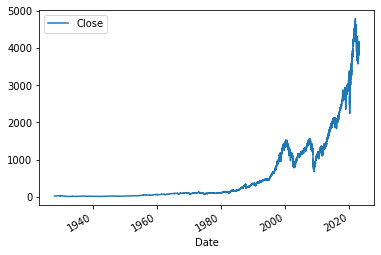

In [7]:
# Plotting closing price against index

sp500.plot.line(y="Close", use_index=True)

In [8]:
# Removing unnecessary columns

del sp500["Dividends"]
del sp500["Stock Splits"]

### Setting Up Target for Machine Learning

In [9]:
# Creating price of stock the following day

sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,4164.000000
2023-02-07 00:00:00-05:00,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,4117.859863
2023-02-08 00:00:00-05:00,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,4081.500000


In [10]:
# Create target column to determine if tomorrow's price is greater than today's price

sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,4164.000000,1
2023-02-07 00:00:00-05:00,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,4117.859863,0
2023-02-08 00:00:00-05:00,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,4081.500000,0


In [11]:
# Removing all data before 1990

sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,4164.000000,1
2023-02-07 00:00:00-05:00,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,4117.859863,0
2023-02-08 00:00:00-05:00,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,4081.500000,0


### Training An Initial Machine Learning Model

In [12]:
# Using Random forest model since its resistant to overfitting and can pick non linear relationships

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [13]:
# Measuring accuracy of the model

from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [14]:
# Converting predictions to pandas series

preds = pd.Series(preds, index=test.index)
preds

Date
2022-09-20 00:00:00-04:00    1
2022-09-21 00:00:00-04:00    0
2022-09-22 00:00:00-04:00    1
2022-09-23 00:00:00-04:00    1
2022-09-26 00:00:00-04:00    1
                            ..
2023-02-06 00:00:00-05:00    1
2023-02-07 00:00:00-05:00    0
2023-02-08 00:00:00-05:00    1
2023-02-09 00:00:00-05:00    0
2023-02-10 00:00:00-05:00    1
Length: 100, dtype: int64

In [15]:
# Calculating precision score

precision_score(test["Target"], preds)

0.34285714285714286

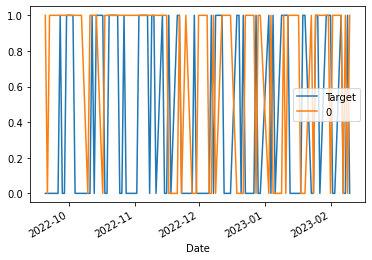

In [16]:
# Plot prediction

combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

### Building A Backtesting System

In [17]:
# Creating a prediction function

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [18]:
# Creating a backtest function

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [19]:
# Backtesting

predictions = backtest(sp500, model, predictors)

In [20]:
# Counting how many times each type of prediction was made

predictions["Predictions"].value_counts()

0    3397
1    2446
Name: Predictions, dtype: int64

In [21]:
# Checking precision score

precision_score(predictions["Target"], predictions["Predictions"])

0.5278004905968929

In [22]:
# Percentage of days market went up

predictions["Target"].value_counts() / predictions.shape[0]

1    0.533972
0    0.466028
Name: Target, dtype: float64

### Adding Additional Predictors To Our Model

In [23]:
# Creating a variery of rolling averages and trend sum

horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages['Close']

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,4164.000000,1,0.996920,0.0,0.996716,3.0,1.038826,27.0,1.017178,111.0,1.121755,536.0
2023-02-07 00:00:00-05:00,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,4117.859863,0,1.006395,1.0,1.005286,3.0,1.050360,28.0,1.030637,111.0,1.135766,536.0
2023-02-08 00:00:00-05:00,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,4081.500000,0,0.994429,1.0,0.994211,2.0,1.038017,27.0,1.019690,110.0,1.122772,535.0


In [24]:
# Removing extra rows by dropping NaN

sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03 00:00:00-05:00,4136.689941,4182.359863,4123.359863,4136.479980,4694510000,4111.080078,0,0.994796,1.0,1.007432,3.0,1.046491,28.0,1.023085,111.0,1.129097,537.0
2023-02-06 00:00:00-05:00,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,4164.000000,1,0.996920,0.0,0.996716,3.0,1.038826,27.0,1.017178,111.0,1.121755,536.0
2023-02-07 00:00:00-05:00,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,4117.859863,0,1.006395,1.0,1.005286,3.0,1.050360,28.0,1.030637,111.0,1.135766,536.0


### Improving Our Model

In [25]:
# Increasing estimators and reducing sample split

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [26]:
# Returning probability instead of exact value

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [27]:
# Backtesting

predictions = backtest(sp500, model, new_predictors)

In [28]:
# Counting number of days per prediction

predictions["Predictions"].value_counts()

0.0    4029
1.0     813
Name: Predictions, dtype: int64

In [29]:
# Checking precision scores

precision_score(predictions["Target"], predictions["Predictions"])

0.5694956949569495